In [44]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import os
import matplotlib.font_manager as fm
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

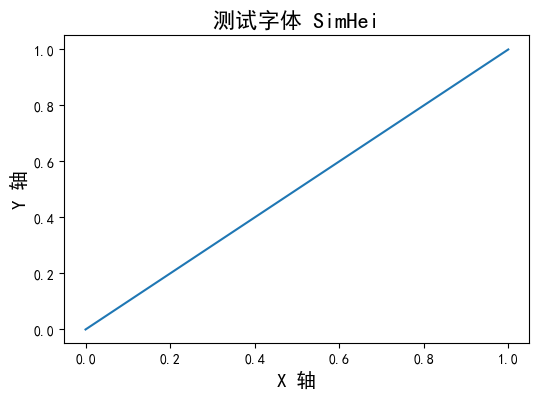

In [45]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 下载 SimHei.ttf 字体文件并放在工作目录
# 如果已经下载了字体文件，请确保路径正确
font_path = '/Users/yue.a.tao/Desktop/Downloads/SimHei.ttf'

# 将字体文件添加到 Matplotlib
fm.fontManager.addfont(font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 验证是否可以使用 SimHei 字体
plt.figure(figsize=(6, 4))
plt.title('测试字体 SimHei', fontsize=16)
plt.plot([0, 1], [0, 1])
plt.xlabel('X 轴', fontsize=14)
plt.ylabel('Y 轴', fontsize=14)
plt.show()

In [46]:
# 设置工作目录
os.chdir("/Users/yue.a.tao/Desktop/Desktop/Gum/Data")

In [47]:
# 读取 Excel 文件
weight = pd.read_excel("GumWeight_20240424_20240522.xlsx")

# 查看数据的前几行
# print(weight.head())

In [48]:
weight = weight[['Date', 'Item', 'Shift', 'Actual']]

In [49]:
# 修改 Actual 列的名称为 Weight
weight = weight.rename(columns={'Actual': 'Weight'})

In [50]:
# 将 Shift 和 Item 列转换为分类类型
weight['Shift'] = weight['Shift'].astype('category')
weight['Item'] = weight['Item'].astype('category')

# 查看数据的前几行
print(weight.head())

                 Date                Item       Shift  Weight
0 2024-04-24 00:13:05  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.16
1 2024-04-24 00:13:09  FVWM（FIVE奔涌西瓜-NCS）  晚班           34.98
2 2024-04-24 00:14:17  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.40
3 2024-04-24 00:14:20  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.08
4 2024-04-24 00:20:15  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.49


In [51]:
# 读取另一个 Excel 文件
file_path = "Priori_Knowledge.xlsx"
priori = pd.read_excel(file_path)

# 查看数据的前几行
print(priori.head())

# 将数据框转为 pandas 数据框
priori = pd.DataFrame(priori)

  Parameter Effect  Importance  Lower Boundary  Upper Boundary  Delta_X  \
0      大辊速度      -           4          20.000           25.00     1.50   
1    1号辊轮速度      -           4          75.000           85.00     1.50   
2     1号辊间隙      +           3           0.100            0.12     0.01   
3    2号辊轮速度      -           4         110.000          125.00     1.50   
4     2号辊间隙      +           3           0.065            0.08     0.01   

   Delta_Y  Feedback Time 生产中超重  生产中偏轻 开机不顺  表面粉不均匀  Threshold  Lower_K  \
0      0.1            2.0     3    3.0    4     1.0      2.000     -0.1   
1      0.1            2.0     3    3.0    4     1.0      2.000     -0.1   
2      0.1            2.0     2    2.0    3     3.0      0.001      5.0   
3      0.1            2.0     3    3.0    4     1.0      2.000     -0.1   
4      0.1            2.0     2    2.0    3     3.0      0.001      5.0   

   Upper_K  
0    -0.05  
1    -0.05  
2    15.00  
3    -0.05  
4    15.00  


In [52]:
# 定义含糖和无糖产品
sugar = ["DMLM（绿箭青柠薄荷）", "DMRR（真叶玫瑰薄荷）", "DMRM（真叶薄荷）", "DMRJ（茉莉薄荷）", 
         "DMRC（绿箭樱花薄荷）", "DMPE 绿箭原味薄荷", "WSP（白箭留兰香薄荷）", 
         "DMPY（绿箭金装薄荷）", "RPWP（维能西瓜红石榴）"]

# 确定sugar_free类的元素
sugar_free = list(set(weight['Item'].unique()) - set(sugar))

In [53]:
# 在 weight 数据框中新增 Sugar 列
weight['Sugar'] = np.where(weight['Item'].isin(sugar), 'Sugar', 'Sugar Free')

In [54]:
print(weight.head())

                 Date                Item       Shift  Weight       Sugar
0 2024-04-24 00:13:05  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.16  Sugar Free
1 2024-04-24 00:13:09  FVWM（FIVE奔涌西瓜-NCS）  晚班           34.98  Sugar Free
2 2024-04-24 00:14:17  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.40  Sugar Free
3 2024-04-24 00:14:20  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.08  Sugar Free
4 2024-04-24 00:20:15  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.49  Sugar Free


In [55]:
# Item 变化则为一个新的batch
weight['batch'] = (weight['Item'] != weight['Item'].shift()).cumsum()

# 显示处理后的数据
print(weight.head())

                 Date                Item       Shift  Weight       Sugar  \
0 2024-04-24 00:13:05  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.16  Sugar Free   
1 2024-04-24 00:13:09  FVWM（FIVE奔涌西瓜-NCS）  晚班           34.98  Sugar Free   
2 2024-04-24 00:14:17  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.40  Sugar Free   
3 2024-04-24 00:14:20  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.08  Sugar Free   
4 2024-04-24 00:20:15  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.49  Sugar Free   

   batch  
0      1  
1      1  
2      1  
3      1  
4      1  


In [56]:
# 对Weight列进行滚动平均（窗口大小为5）
# min_periods=1确保窗口不足5个数据点时也计算平均值
weight['Weight_smoothed'] = weight['Weight'].rolling(window=5, min_periods=1).mean()

In [57]:
# 显示处理后的数据
print(weight.head(10))

                 Date                Item       Shift  Weight       Sugar  \
0 2024-04-24 00:13:05  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.16  Sugar Free   
1 2024-04-24 00:13:09  FVWM（FIVE奔涌西瓜-NCS）  晚班           34.98  Sugar Free   
2 2024-04-24 00:14:17  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.40  Sugar Free   
3 2024-04-24 00:14:20  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.08  Sugar Free   
4 2024-04-24 00:20:15  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.49  Sugar Free   
5 2024-04-24 00:20:21  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.74  Sugar Free   
6 2024-04-24 00:26:57  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.32  Sugar Free   
7 2024-04-24 00:27:01  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.42  Sugar Free   
8 2024-04-24 00:37:01  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.02  Sugar Free   
9 2024-04-24 00:37:05  FVWM（FIVE奔涌西瓜-NCS）  晚班           35.20  Sugar Free   

   batch  Weight_smoothed  
0      1           35.160  
1      1           35.070  
2      1           35.180  
3      1           35.155  
4      1    

In [63]:
# 确保 'Date' 列是 datetime 类型
weight['Date'] = pd.to_datetime(weight['Date'])
weight['Date'] = weight['Date'].dt.tz_localize('UTC')

In [64]:
weight['Date'].dtype

datetime64[ns, UTC]

In [58]:
# load parameter文件
para = pd.read_csv("para_wide.csv")

In [59]:
# 重命名时间列以匹配其他数据框
para.rename(columns={'updated_time': 'Date'}, inplace=True)

# 显示数据前几行
print(para.head())

                   Date  1号冷辊入口压力  1号冷辊入口温度  1号冷辊出口压力  1号冷辊出口温度  1号冷辊皮带速度  \
0  2024-04-24T10:26:00Z  1.762153 -19.92477  1.079282 -17.57813  104.2790   
1  2024-04-24T10:26:01Z  1.747685 -19.92477  1.087963 -17.57813  104.4115   
2  2024-04-24T10:26:02Z  1.753472 -19.95370  1.079282 -17.59259  105.7839   
3  2024-04-24T10:26:03Z  1.752025 -19.95370  1.086516 -17.60706  105.2637   
4  2024-04-24T10:26:04Z  1.741898 -19.98264  1.087963 -17.62153  104.1218   

     1号辊轮速度     1号辊间隙  2号冷辊入口压力  2号冷辊入口温度  ...   挤压机料位高低  表面粉上搅拌机速度  \
0  81.45330  0.108241  1.724537 -20.47454  ...  117.0587   62.53433   
1  81.45525  0.108241  1.730324 -20.50347  ...  150.1295   62.53433   
2  81.45438  0.108241  1.728877 -20.50347  ...  145.4269   62.53433   
3  81.45470  0.108241  1.728877 -20.50347  ...  155.2525   62.53433   
4  81.45380  0.108241  1.731771 -20.50347  ...  151.8881   62.53433   

   表面粉上涂抹器速度  表面粉上螺杆速度  表面粉上表面粉皮带速度  表面粉下搅拌机速度  表面粉下涂抹器速度  表面粉下螺杆速度  \
0   62.53433  78.16639     85.99768   6

In [70]:
# 确保 'Date' 列是 datetime 类型
para['Date'] = pd.to_datetime(para['Date'])

# 将 'Date' 列本地化为 UTC 时间
para['Date'] = para['Date'].dt.tz_convert('UTC')

In [ ]:
para['Date'].dtype

In [72]:
para.head()

,Date,1号冷辊入口压力,1号冷辊入口温度,1号冷辊出口压力,1号冷辊出口温度,1号冷辊皮带速度,1号辊轮速度,1号辊间隙,2号冷辊入口压力,2号冷辊入口温度,...,挤压机料位高低,表面粉上搅拌机速度,表面粉上涂抹器速度,表面粉上螺杆速度,表面粉上表面粉皮带速度,表面粉下搅拌机速度,表面粉下涂抹器速度,表面粉下螺杆速度,表面粉下表面粉皮带速度,表面粉回粉皮带速度
0,2024-04-24 10:26:00+00:00,1.762153,-19.92477,1.079282,-17.57813,104.2790,81.45330,0.108241,1.724537,-20.47454,...,117.0587,62.53433,62.53433,78.16639,85.99768,69.48056,69.48056,93.16364,39.08319,30.00061
1,2024-04-24 10:26:01+00:00,1.747685,-19.92477,1.087963,-17.57813,104.4115,81.45525,0.108241,1.730324,-20.50347,...,150.1295,62.53433,62.53433,78.16639,85.99768,69.48056,69.48056,93.16364,39.08319,30.00061
2,2024-04-24 10:26:02+00:00,1.753472,-19.95370,1.079282,-17.59259,105.7839,81.45438,0.108241,1.728877,-20.50347,...,145.4269,62.53433,62.53433,78.16639,85.99768,69.48056,69.48056,93.16364,39.08319,30.00061
3,2024-04-24 10:26:03+00:00,1.752025,-19.95370,1.086516,-17.60706,105.2637,81.45470,0.108241,1.728877,-20.50347,...,155.2525,62.53433,62.53433,78.16639,85.99768,69.48056,69.48056,93.16364,39.08319,30.00061
4,2024-04-24 10:26:04+00:00,1.741898,-19.98264,1.087963,-17.62153,104.1218,81.45380,0.108241,1.731771,-20.50347,...,151.8881,62.53433,62.53433,78.16639,85.99768,69.48056,69.48056,93.16364,39.08319,30.00061


In [73]:
# 定义需要保留的列
col_x = ["Date", 
         "大辊速度",
         "1号辊轮速度",
         "1号辊间隙",
         "2号辊轮速度",
         "2号辊间隙",
         "3号辊轮速度",
         "3号辊间隙",
         "Forming Roller 辊轮速度",
         "Forming Roller 定型辊间隙", 
         "1号冷辊入口温度", 
         "2号冷辊入口温度",
         "Cross Scoring Rollers 横刀速度"]

# 从参数数据表中筛选出需要的列
para_key = para[col_x]

# 显示处理后的数据
print(para_key.head())

                       Date      大辊速度    1号辊轮速度     1号辊间隙    2号辊轮速度     2号辊间隙  \
0 2024-04-24 10:26:00+00:00  24.15620  81.45330  0.108241  116.0377  0.075622   
1 2024-04-24 10:26:01+00:00  24.15553  81.45525  0.108241  116.0655  0.075623   
2 2024-04-24 10:26:02+00:00  24.15518  81.45438  0.108241  116.0486  0.075622   
3 2024-04-24 10:26:03+00:00  24.15519  81.45470  0.108241  116.0373  0.075622   
4 2024-04-24 10:26:04+00:00  24.15569  81.45380  0.108241  116.0629  0.075622   

     3号辊轮速度     3号辊间隙  Forming Roller 辊轮速度  Forming Roller 定型辊间隙  1号冷辊入口温度  \
0  133.9595  0.069430             148.4655              0.066039 -19.92477   
1  133.9488  0.069429             148.4939              0.066039 -19.92477   
2  133.9579  0.069431             148.4140              0.066039 -19.95370   
3  133.9525  0.069431             148.4158              0.066039 -19.95370   
4  133.9594  0.069430             148.4442              0.066039 -19.98264   

   2号冷辊入口温度  Cross Scoring Rollers 横刀速度  
0 

In [74]:
# 筛选出值小于1000的行（忽略Date列）
para_key_filtered = para_key.loc[:, para_key.columns != 'Date'].applymap(lambda x: x < 1000)

# 显示处理后的数据
print(para_key_filtered.head())

   大辊速度  1号辊轮速度  1号辊间隙  2号辊轮速度  2号辊间隙  3号辊轮速度  3号辊间隙  Forming Roller 辊轮速度  \
0  True    True   True    True   True    True   True                 True   
1  True    True   True    True   True    True   True                 True   
2  True    True   True    True   True    True   True                 True   
3  True    True   True    True   True    True   True                 True   
4  True    True   True    True   True    True   True                 True   

   Forming Roller 定型辊间隙  1号冷辊入口温度  2号冷辊入口温度  Cross Scoring Rollers 横刀速度  
0                  True      True      True                        True  
1                  True      True      True                        True  
2                  True      True      True                        True  
3                  True      True      True                        True  
4                  True      True      True                        True  


In [20]:
# 使用布尔索引过滤para_key数据框，只保留所有值都小于1000的行
para_key = para_key[para_key_filtered.all(axis=1)]

# 显示处理后的数据
print(para_key.head())

                   Date      大辊速度    1号辊轮速度     1号辊间隙    2号辊轮速度     2号辊间隙  \
0  2024-04-24T10:26:00Z  24.15620  81.45330  0.108241  116.0377  0.075622   
1  2024-04-24T10:26:01Z  24.15553  81.45525  0.108241  116.0655  0.075623   
2  2024-04-24T10:26:02Z  24.15518  81.45438  0.108241  116.0486  0.075622   
3  2024-04-24T10:26:03Z  24.15519  81.45470  0.108241  116.0373  0.075622   
4  2024-04-24T10:26:04Z  24.15569  81.45380  0.108241  116.0629  0.075622   

     3号辊轮速度     3号辊间隙  Forming Roller 辊轮速度  Forming Roller 定型辊间隙  1号冷辊入口温度  \
0  133.9595  0.069430             148.4655              0.066039 -19.92477   
1  133.9488  0.069429             148.4939              0.066039 -19.92477   
2  133.9579  0.069431             148.4140              0.066039 -19.95370   
3  133.9525  0.069431             148.4158              0.066039 -19.95370   
4  133.9594  0.069430             148.4442              0.066039 -19.98264   

   2号冷辊入口温度  Cross Scoring Rollers 横刀速度  
0 -20.47454               

In [75]:
# 定义四舍五入平滑降噪的函数
def smooth_rounding(df, exclude_col=['Date']):
    df_smooth = df.copy()
    # 选择所有数值类型的列，排除exclude_col中指定的列
    numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_col)
    
    for col in numeric_cols:
        # 计算列的标准差，忽略缺失值。
        std_dev = df[col].std(skipna=True)
        # 计算四舍五入的小数点位数：如果标准差大于等于1，保留1位小数；否则，保留足够的小数位数以平滑数据。
        round_digits = 1 if std_dev >= 1 else int(np.ceil(-np.log10(std_dev)) + 1)
        # 对列中的数据进行四舍五入
        df_smooth[col] = df[col].round(round_digits)
    
    return df_smooth

# 应用函数
para_smoothed = smooth_rounding(para_key)

# 显示处理后的数据
print(para_smoothed.head())

                       Date  大辊速度  1号辊轮速度   1号辊间隙  2号辊轮速度   2号辊间隙  3号辊轮速度  \
0 2024-04-24 10:26:00+00:00  24.2    81.5  0.1082   116.0  0.0756   134.0   
1 2024-04-24 10:26:01+00:00  24.2    81.5  0.1082   116.1  0.0756   133.9   
2 2024-04-24 10:26:02+00:00  24.2    81.5  0.1082   116.0  0.0756   134.0   
3 2024-04-24 10:26:03+00:00  24.2    81.5  0.1082   116.0  0.0756   134.0   
4 2024-04-24 10:26:04+00:00  24.2    81.5  0.1082   116.1  0.0756   134.0   

    3号辊间隙  Forming Roller 辊轮速度  Forming Roller 定型辊间隙  1号冷辊入口温度  2号冷辊入口温度  \
0  0.0694                148.5                 0.066     -19.9     -20.5   
1  0.0694                148.5                 0.066     -19.9     -20.5   
2  0.0694                148.4                 0.066     -20.0     -20.5   
3  0.0694                148.4                 0.066     -20.0     -20.5   
4  0.0694                148.4                 0.066     -20.0     -20.5   

   Cross Scoring Rollers 横刀速度  
0                       -20.2  
1               

In [76]:
# 删除"Forming Roller 辊轮速度"小于等于10的所有行
para_smoothed2 = para_smoothed[para_smoothed['Forming Roller 辊轮速度'] > 10]

# 显示处理后的数据
# print(para_smoothed2.head())

In [77]:
# 计算para_smoothed2的行数和列数
rows, columns = para_smoothed2.shape

# 打印行数和列数
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1134837
Number of columns: 13


In [78]:
# 确保可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 定义绘图函数
def plot_scaled_parameters(para_smoothed, weight, batch):
    # 确保Date列被正确解析为日期时间类型
    para_smoothed = para_smoothed.copy()  # 避免对原数据进行修改
    weight = weight.copy()  # 避免对原数据进行修改
    para_smoothed['Date'] = pd.to_datetime(para_smoothed['Date']).dt.tz_localize(None)
    weight['Date'] = pd.to_datetime(weight['Date']).dt.tz_localize(None)
    
    # 仅选择指定batch的数据
    weight_batch = weight[weight['batch'] == batch]
    
    # 获取batch的起始和结束时间
    start_datetime = weight_batch['Date'].min()
    end_datetime = weight_batch['Date'].max()
    
    # 根据Date列合并数据框
    merged_data_batch = pd.merge(para_smoothed, weight_batch, on='Date')
    
    # 标准化函数
    def scale_data(x):
        # 计算数组 x 的均值（忽略 NaN 值）和 std（忽略 NaN 值）
        return (x - np.nanmean(x)) / np.nanstd(x)
    
    # 标准化数据
    merged_data_batch['Scaled_1_Roller_Gap'] = scale_data(merged_data_batch['1号辊间隙'])
    merged_data_batch['Scaled_2_Roller_Gap'] = scale_data(merged_data_batch['2号辊间隙'])
    merged_data_batch['Scaled_Gap_3rd_Roller'] = scale_data(merged_data_batch['3号辊间隙'])
    merged_data_batch['Scaled_1_Cold_Roller_Temp'] = scale_data(merged_data_batch['1号冷辊入口温度'])
    merged_data_batch['Scaled_2_Cold_Roller_Temp'] = scale_data(merged_data_batch['2号冷辊入口温度'])
    merged_data_batch['Scaled_Cross_Scoring_Rollers_Speed'] = scale_data(merged_data_batch['Cross Scoring Rollers 横刀速度'])
    merged_data_batch['Scaled_Forming_Roller_Gap'] = scale_data(merged_data_batch['Forming Roller 定型辊间隙'])
    merged_data_batch['Scaled_Weight'] = scale_data(merged_data_batch['Weight_smoothed'])
    
    # 筛选时间范围内的数据
    filtered_data = merged_data_batch[(merged_data_batch['Date'] >= start_datetime) & 
                                      (merged_data_batch['Date'] <= end_datetime)]
    
    # 作图
    plt.figure(figsize=(14, 8))
    
    plt.plot(filtered_data['Date'], filtered_data['Scaled_1_Roller_Gap'], label='1号辊间隙', color='pink')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_2_Roller_Gap'], label='2号辊间隙', color='purple')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_Gap_3rd_Roller'], label='3号辊间隙', color='darkgreen')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_1_Cold_Roller_Temp'], label='1号冷辊入口温度', color='green')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_2_Cold_Roller_Temp'], label='2号冷辊入口温度', color='yellow')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_Cross_Scoring_Rollers_Speed'], label='Cross Scoring Rollers 横刀速度', color='orange')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_Forming_Roller_Gap'], label='Forming Roller 定型辊间隙', color='red')
    plt.plot(filtered_data['Date'], filtered_data['Scaled_Weight'], label='Weight_smoothed', color='blue')

    plt.title(f"Scaled Parameters over Time (Batch {batch})")
    plt.xlabel("Date")
    plt.ylabel("Scaled Values")
    plt.legend(title='')
    plt.xticks(rotation=45)
    # 紧凑布局：
    plt.tight_layout()
    
    plt.show()

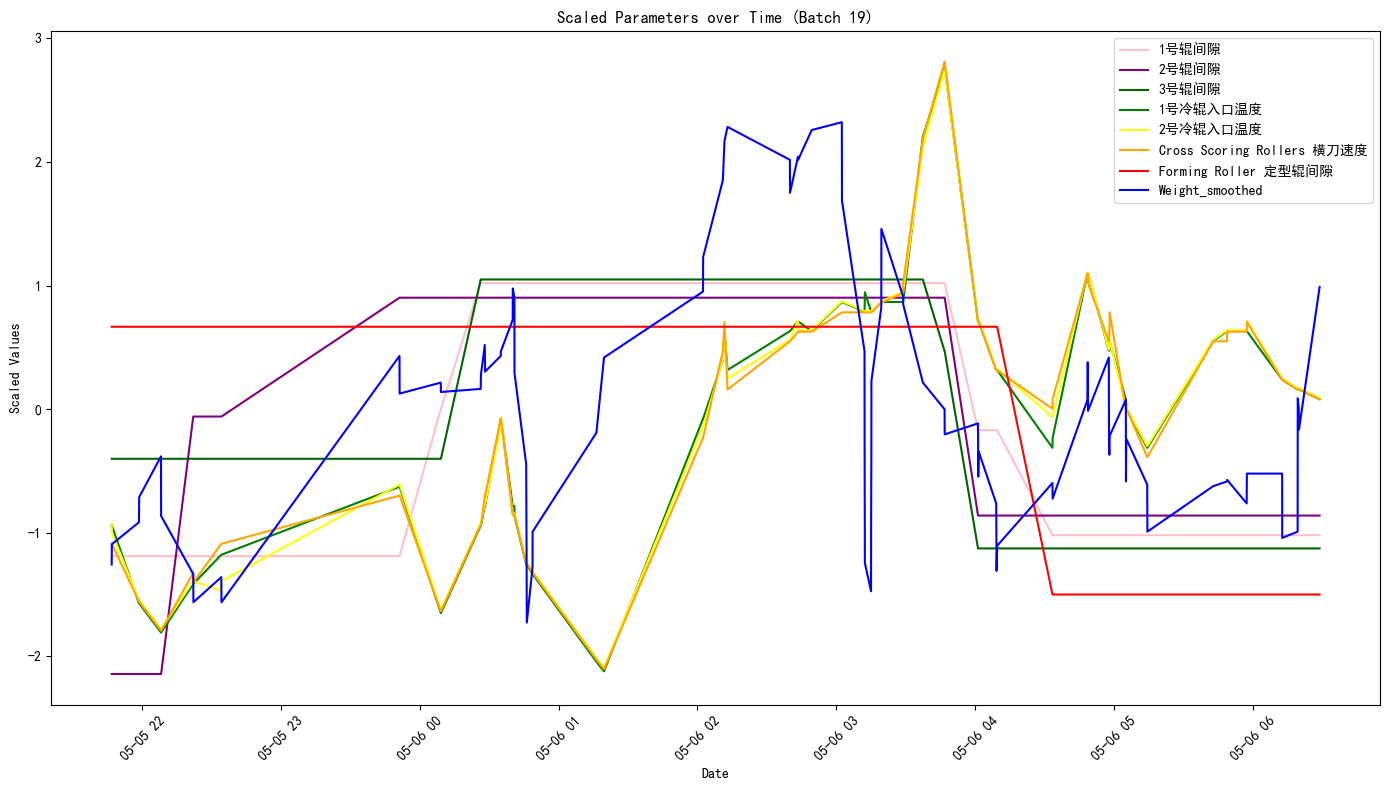

In [79]:
# 调用函数绘图
plot_scaled_parameters(para_smoothed2, weight, batch=19)

In [80]:
# 将 'Date' 列转换为 datetime 并加上3分钟的延迟
para_smoothed2['Date'] = pd.to_datetime(para_smoothed2['Date']) + timedelta(minutes=3)

/var/folders/ts/2rkwb4bs3_7b5z8k6vl8cqhm0000gn/T/ipykernel_28824/3791606247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para_smoothed2['Date'] = pd.to_datetime(para_smoothed2['Date']) + timedelta(minutes=3)


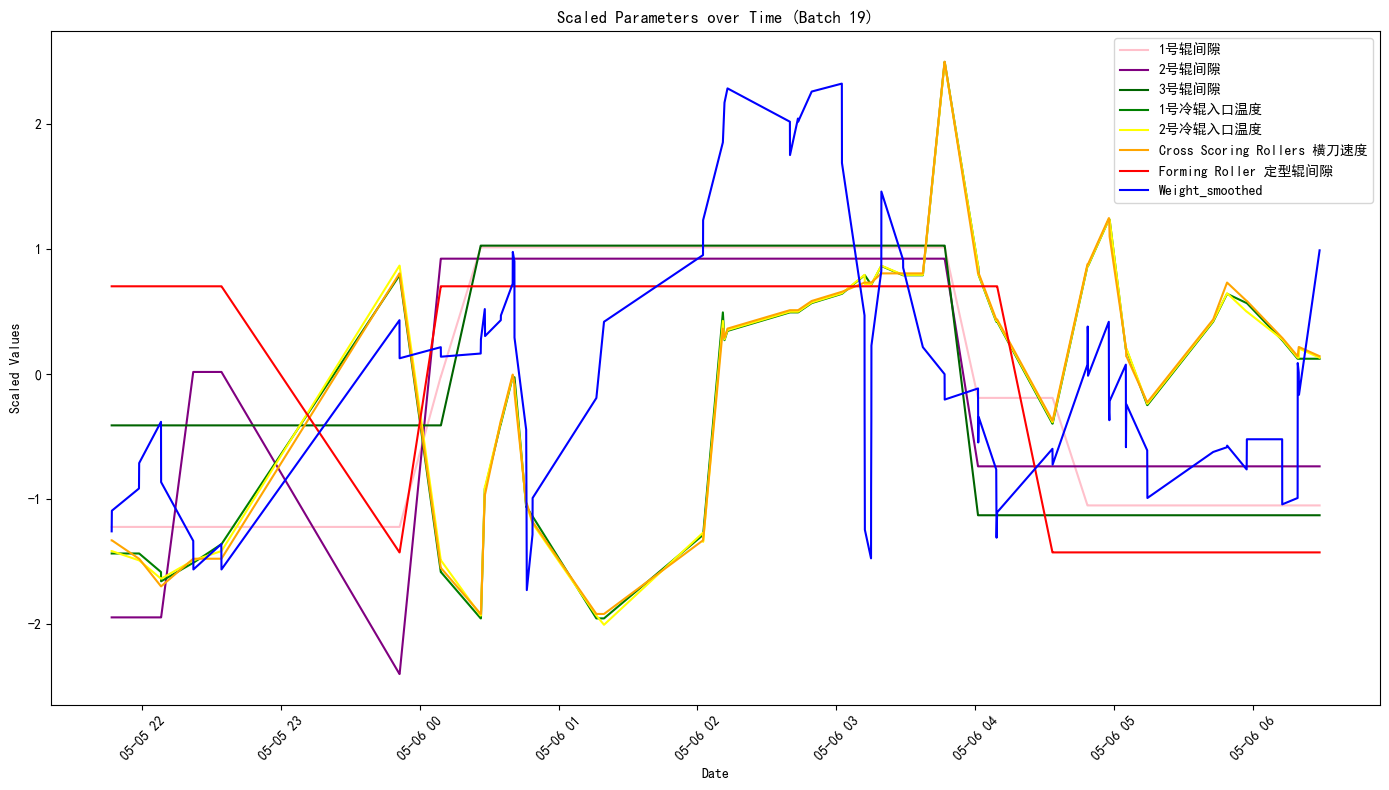

In [83]:
# 调用函数绘图
plot_scaled_parameters(para_smoothed2, weight, batch=19)

In [84]:
# combine X and Y

# 确保 para_smoothed2 按日期排序
para_smoothed2 = para_smoothed2.sort_values(by='Date')

# 进行滚动连接，找到每个 weight 时间点最近的 para_smoothed 数据
# 使用 merge_asof 来实现滚动连接
# pd.merge_asof：这是Pandas提供的一个方法，用于类似SQL的滚动连接（rolling join）。
# 它会将 weight 数据中的每个日期与 para_smoothed2 数据中小于或等于该日期的最近日期匹配。
# direction='backward'：表示向后滚动查找，即找到小于或等于 weight 数据中每个日期的最近日期。

combined_data = pd.merge_asof(weight.sort_values('Date'), 
                              para_smoothed2.sort_values('Date'), 
                              on='Date', 
                              direction='backward')

# 删除含有 NA 的行
combined_data = combined_data.dropna()

In [85]:
weight.head()

,Date,Item,Shift,Weight,Sugar,batch,Weight_smoothed
0,2024-04-24 00:13:05+00:00,FVWM（FIVE奔涌西瓜-NCS）,晚班,35.16,Sugar Free,1,35.160
1,2024-04-24 00:13:09+00:00,FVWM（FIVE奔涌西瓜-NCS）,晚班,34.98,Sugar Free,1,35.070
2,2024-04-24 00:14:17+00:00,FVWM（FIVE奔涌西瓜-NCS）,晚班,35.40,Sugar Free,1,35.180
3,2024-04-24 00:14:20+00:00,FVWM（FIVE奔涌西瓜-NCS）,晚班,35.08,Sugar Free,1,35.155
4,2024-04-24 00:20:15+00:00,FVWM（FIVE奔涌西瓜-NCS）,晚班,35.49,Sugar Free,1,35.222


In [91]:
combined_data.head()

,Date,Item,Shift,Weight,Sugar,batch,Weight_smoothed,大辊速度,1号辊轮速度,1号辊间隙,2号辊轮速度,2号辊间隙,3号辊轮速度,3号辊间隙,Forming Roller 辊轮速度,Forming Roller 定型辊间隙,1号冷辊入口温度,2号冷辊入口温度,Cross Scoring Rollers 横刀速度
115,2024-04-24 10:59:02+00:00,AUWM（澳洲FIVE奔涌西瓜味）,早班,34.55,Sugar Free,2,35.480,22.0,81.5,0.1082,116.0,0.0752,134.0,0.0691,148.5,0.065,-20.8,-21.3,-20.7
116,2024-04-24 10:59:09+00:00,AUWM（澳洲FIVE奔涌西瓜味）,早班,35.37,Sugar Free,2,35.522,22.0,81.5,0.1082,116.0,0.0752,134.0,0.0691,148.5,0.065,-20.8,-21.2,-20.7
117,2024-04-24 11:01:53+00:00,AUWM（澳洲FIVE奔涌西瓜味）,早班,35.15,Sugar Free,2,35.412,22.2,81.5,0.1082,116.0,0.0752,134.0,0.0691,148.5,0.065,-20.7,-21.2,-20.7
118,2024-04-24 11:01:55+00:00,AUWM（澳洲FIVE奔涌西瓜味）,早班,35.32,Sugar Free,2,35.274,22.2,81.5,0.1082,116.0,0.0752,134.0,0.0691,148.4,0.065,-20.7,-21.2,-20.7
119,2024-04-24 11:04:47+00:00,AUWM（澳洲FIVE奔涌西瓜味）,早班,35.56,Sugar Free,2,35.190,22.0,81.5,0.1082,116.1,0.0752,134.0,0.0691,148.4,0.065,-20.8,-21.3,-20.7


In [86]:
# 计算combined_data的行数和列数
rows, columns = combined_data.shape

# 打印行数和列数
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4354
Number of columns: 19


In [ ]:
# 设置工作目录
os.chdir("/Users/yue.a.tao/Desktop/Desktop/Gum/Data/EDA_py")

# 定义需要处理的列，排除Date列
col_x = ["大辊速度", "1号辊轮速度", "1号辊间隙", "2号辊轮速度", "2号辊间隙",
         "3号辊轮速度", "3号辊间隙", "Forming Roller 辊轮速度", 
         "Forming Roller 定型辊间隙", "1号冷辊入口温度", 
         "2号冷辊入口温度", "Cross Scoring Rollers 横刀速度"]

# 获取唯一的批次
batches = combined_data['batch'].unique()

# 遍历每个批次
for b in batches:
    batch_data = combined_data[combined_data['batch'] == b]
    
    # 创建文件夹
    os.makedirs(str(b), exist_ok=True)
    
    # 遍历每一个参数
    for param in col_x:
        # 提取该参数的界限值
        lower_boundary = priori[priori['Parameter'] == param]['Lower Boundary'].values[0]
        upper_boundary = priori[priori['Parameter'] == param]['Upper Boundary'].values[0]
        threshold = priori[priori['Parameter'] == param]['Threshold'].values[0]
        
        # 计算该参数的均值
        mean_value = batch_data[param].mean()
        
        # 图1: Trend line趋势图
        plt.figure()
        plt.plot(batch_data['Date'], batch_data[param], color='black')
        plt.axhline(y=lower_boundary, color='red', linestyle='dashed')
        plt.axhline(y=upper_boundary, color='red', linestyle='dashed')
        plt.axhline(y=mean_value, color='blue')
        plt.title(f"Trend Line of {param} Batch {b}")
        plt.xlabel("Date")
        plt.ylabel(param)
        plt.savefig(f"{b}/Trend_Line_{param}.png")
        plt.close()
        
        # 图2: 频率直方图
        bin_width = threshold if threshold > 0 else 1  # 确保阈值大于0
        num_bins = max(1, int((batch_data[param].max() - batch_data[param].min()) / bin_width))  # 确保 bins 为正整数

        plt.figure()
        plt.hist(batch_data[param], bins=num_bins, color='skyblue', edgecolor='black')
        plt.axvline(x=lower_boundary, color='red', linestyle='dashed')
        plt.axvline(x=upper_boundary, color='red', linestyle='dashed')
        plt.axvline(x=mean_value, color='blue')
        plt.title(f"Histogram of {param} Batch {b}")
        plt.xlabel(param)
        plt.ylabel("Frequency")
        plt.savefig(f"{b}/Histogram_{param}.png")
        plt.close()
        
        # 图3: Trend line趋势图（经过scale之后）
        scaler = StandardScaler()
        batch_data['Scaled_Param'] = scaler.fit_transform(batch_data[[param]])
        batch_data['Scaled_Weight'] = scaler.fit_transform(batch_data[['Weight']])
        batch_data['Scaled_Weight_smoothed'] = scaler.fit_transform(batch_data[['Weight_smoothed']])
        
        plt.figure()
        plt.plot(batch_data['Date'], batch_data['Scaled_Param'], label='Scaled_Param', color='red')
        plt.plot(batch_data['Date'], batch_data['Scaled_Weight'], label='Scaled_Weight', color='black')
        plt.plot(batch_data['Date'], batch_data['Scaled_Weight_smoothed'], label='Scaled_Weight_smoothed', color='blue')
        plt.title(f"Scaled Trend Line of {param} with Weight and Weight_smoothed - Batch {b}")
        plt.xlabel("Date")
        plt.ylabel("Scaled Values")
        plt.legend(loc='best')
        plt.savefig(f"{b}/Scaled_Trend_Line_{param}.png")
        plt.close()

In [64]:
# 定义需要保留的列
col_x = ["Date", "大辊速度", "1号辊轮速度", "1号辊间隙", "2号辊轮速度", "2号辊间隙", 
         "3号辊轮速度", "3号辊间隙", "Forming Roller 辊轮速度", "Forming Roller 定型辊间隙", 
         "1号冷辊入口温度", "2号冷辊入口温度", "Cross Scoring Rollers 横刀速度"]

# 创建CSV文件夹和图片文件夹
os.makedirs("py_generate_CSV", exist_ok=True)
os.makedirs("py_generate_VIS", exist_ok=True)

# 定义删除异常值的函数
def remove_outliers(data, variable, sd_threshold=3):
    mean_value = data[variable].mean()
    sd_value = data[variable].std()
    non_outliers = data[np.abs(data[variable] - mean_value) <= sd_threshold * sd_value]
    return non_outliers

# 遍历每个参数
def process_parameter(parameter):
    Threshold = priori.loc[priori['Parameter'] == parameter, 'Threshold'].values[0]
    Lower_K = priori.loc[priori['Parameter'] == parameter, 'Lower_K'].values[0]
    Upper_K = priori.loc[priori['Parameter'] == parameter, 'Upper_K'].values[0]

    # 创建参数对应的图片文件夹
    param_folder = os.path.join("py_generate_VIS", parameter)
    os.makedirs(param_folder, exist_ok=True)

    # 识别波动时间点
    combined_data['Diff'] = combined_data[parameter].diff().fillna(0)
    combined_data['Fluctuation'] = np.abs(combined_data['Diff']) >= Threshold

    fluctuation_points = combined_data[combined_data['Fluctuation'] == True][['Date', 'Diff', 'batch']]

    # 计算波动值
    results = []
    for i, row in fluctuation_points.iterrows():
        date = row['Date']
        diff_value = row['Diff']
        batch = row['batch']
        
        # 找到波动时间点之后最近的 Weight 和 Weight_smoothed 值
        subsequent_values = combined_data[combined_data['Date'] > date].head(1)

        if subsequent_values.empty:
            continue

        weight_before = combined_data.loc[combined_data['Date'] == date, 'Weight'].values[0]
        weight_after = subsequent_values['Weight'].values[0]

        weight_smoothed_before = combined_data.loc[combined_data['Date'] == date, 'Weight_smoothed'].values[0]
        weight_smoothed_after = subsequent_values['Weight_smoothed'].values[0]

        weight_change = weight_after - weight_before
        weight_smoothed_change = weight_smoothed_after - weight_smoothed_before

        results.append({
            'Date': date,
            'Batch': batch,
            'Diff': diff_value,
            'Weight_change': weight_change,
            'Weight_smoothed_change': weight_smoothed_change
        })

    results = pd.DataFrame(results)

    if not results.empty:
        results = remove_outliers(results, 'Diff')
        results = remove_outliers(results, 'Weight_change')
        results = remove_outliers(results, 'Weight_smoothed_change')

        # 绘制未筛选 K 值的数据
        if not results.empty:
            model1 = LinearRegression()
            model1.fit(results[['Diff']], results['Weight_change'])
            intercept1, slope1 = model1.intercept_, model1.coef_[0]
            formula1 = f"Weight_change = {intercept1:.4f} + {slope1:.4f} * Diff"

            plt.figure()
            plt.scatter(results['Diff'], results['Weight_change'], color='blue')
            plt.plot(results['Diff'], model1.predict(results[['Diff']]), color='red')
            plt.title(f"Regression: Diff vs Weight_change\n{formula1}\nParameter: {parameter}")
            plt.xlabel("Diff (delta X)")
            plt.ylabel("Weight_change (delta Y)")
            plt.savefig(os.path.join(param_folder, f"plot1_all_{parameter}.png"))
            plt.close()

            model2 = LinearRegression()
            model2.fit(results[['Diff']], results['Weight_smoothed_change'])
            intercept2, slope2 = model2.intercept_, model2.coef_[0]
            formula2 = f"Weight_smoothed_change = {intercept2:.4f} + {slope2:.4f} * Diff"

            plt.figure()
            plt.scatter(results['Diff'], results['Weight_smoothed_change'], color='blue')
            plt.plot(results['Diff'], model2.predict(results[['Diff']]), color='red')
            plt.title(f"Regression: Diff vs Weight_smoothed_change\n{formula2}\nParameter: {parameter}")
            plt.xlabel("Diff (delta X)")
            plt.ylabel("Weight_smoothed_change (delta Y)")
            plt.savefig(os.path.join(param_folder, f"plot2_all_{parameter}.png"))
            plt.close()

        results['K1'] = np.where(results['Weight_change'] == 0, np.nan, results['Weight_change'] / results['Diff'])
        results['K2'] = np.where(results['Weight_smoothed_change'] == 0, np.nan, results['Weight_smoothed_change'] / results['Diff'])

        filtered_results_K1 = results[(results['K1'] >= Lower_K) & (results['K1'] <= Upper_K)]
        filtered_results_K2 = results[(results['K2'] >= Lower_K) & (results['K2'] <= Upper_K)]

        if not filtered_results_K1.empty:
            model1 = LinearRegression()
            model1.fit(filtered_results_K1[['Diff']], filtered_results_K1['Weight_change'])
            intercept1, slope1 = model1.intercept_, model1.coef_[0]
            formula1 = f"Weight_change = {intercept1:.4f} + {slope1:.4f} * Diff"

            plt.figure()
            plt.scatter(filtered_results_K1['Diff'], filtered_results_K1['Weight_change'], color='blue')
            plt.plot(filtered_results_K1['Diff'], model1.predict(filtered_results_K1[['Diff']]), color='red')
            plt.title(f"Regression: Diff vs Weight_change\n{formula1}\nParameter: {parameter}")
            plt.xlabel("Diff (delta X)")
            plt.ylabel("Weight_change (delta Y)")
            plt.savefig(os.path.join(param_folder, f"plot1_{parameter}.png"))
            plt.close()

        if not filtered_results_K2.empty:
            model2 = LinearRegression()
            model2.fit(filtered_results_K2[['Diff']], filtered_results_K2['Weight_smoothed_change'])
            intercept2, slope2 = model2.intercept_, model2.coef_[0]
            formula2 = f"Weight_smoothed_change = {intercept2:.4f} + {slope2:.4f} * Diff"

            plt.figure()
            plt.scatter(filtered_results_K2['Diff'], filtered_results_K2['Weight_smoothed_change'], color='blue')
            plt.plot(filtered_results_K2['Diff'], model2.predict(filtered_results_K2[['Diff']]), color='red')
            plt.title(f"Regression: Diff vs Weight_smoothed_change\n{formula2}\nParameter: {parameter}")
            plt.xlabel("Diff (delta X)")
            plt.ylabel("Weight_smoothed_change (delta Y)")
            plt.savefig(os.path.join(param_folder, f"plot2_{parameter}.png"))
            plt.close()

        results.to_csv(os.path.join("py_generate_CSV", f"results_{parameter}.csv"), index=False)

In [88]:
parameters = [param for param in col_x if param != 'Date']
for param in parameters:
    process_parameter(param)

NameError: name 'process_parameter' is not defined